<a href="https://colab.research.google.com/github/Zivilevs/Data_Science_Projects/blob/main/Titanic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis and Classification with Logistic Regression

**Titanic passengers dataset** 

For each passenger, we’ll have some data on them as well as whether or not they survived the crash. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


Let's build some intuition about data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          887 non-null    int64  
 1   Pclass            887 non-null    int64  
 2   Sex               887 non-null    object 
 3   Age               887 non-null    float64
 4   Siblings/Spouses  887 non-null    int64  
 5   Parents/Children  887 non-null    int64  
 6   Fare              887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [4]:
# Describe statistics for this DataFrame including the categorical "Sex" feature.

df.describe(include="all")

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
count,887.000000,887.000000,887,887.000000,887.000000,887.000000,887.00000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,573,NaN,NaN,NaN,NaN
mean,0.385569,2.305524,NaN,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,NaN,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,NaN,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.13750


How many minors were on the ship?

In [5]:
df['Age'].lt(18).sum()


130

## Visualization

In [6]:
import matplotlib.pyplot as plt

Let's spot some relationships between features.

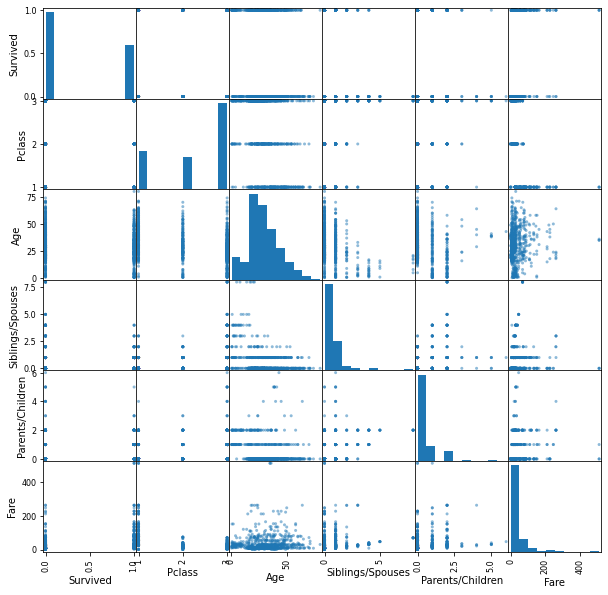

In [7]:
scatter_mtx = pd.plotting.scatter_matrix(df, figsize=(10,10))

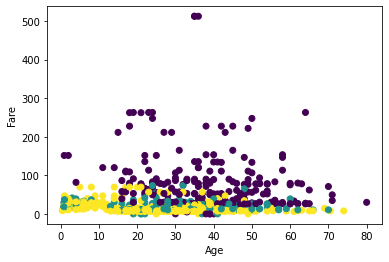

In [8]:
plt.scatter(df['Age'], df['Fare'], c=df['Pclass'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

## Data Preparation

In [9]:
max_fare = df['Fare'].max()

In [10]:
df.loc[df['Fare']==max_fare]

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
257,1,1,female,35.0,0,0,512.3292
676,1,1,male,36.0,0,1,512.3292
733,1,1,male,35.0,0,0,512.3292


In [11]:
#  Creating a new column.

df['male'] = df['Sex'] == 'male'
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,male
0,0,3,male,22.0,1,0,7.2500,True
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,False
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True


For our model will need all our columns numerical.
Now, let’s take all the features and create a numpy array called X. After we store target values in array y.

In [12]:
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X

array([[3, True, 22.0, 1, 0, 7.25],
       [1, False, 38.0, 1, 0, 71.2833],
       [3, False, 26.0, 0, 0, 7.925],
       ...,
       [3, False, 7.0, 1, 2, 23.45],
       [1, True, 26.0, 0, 0, 30.0],
       [3, True, 32.0, 0, 0, 7.75]], dtype=object)

In [13]:
y = df['Survived'].values


## Regression Model with Scikit-learn lib

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, )
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred = model.predict(X_test)

## Model Evaluation

In [19]:
# score is correct number of predictions divided by number of predictions (y == y_pred).sum()/y.shape[0]
model.score(X_test,y_test)

0.7715355805243446

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

accuracy: 0.7715355805243446
precision: 0.7075471698113207
recall: 0.7142857142857143
f1 score: 0.7109004739336493


In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[131  31]
 [ 30  75]]


## ROC curve

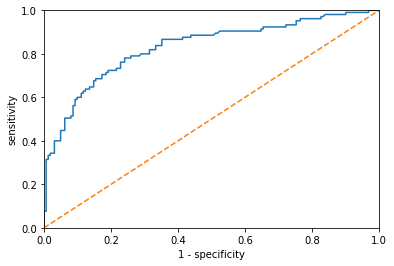

In [23]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


y_pred_proba = model.predict_proba(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])


plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('1 - specificity')  # fpr
plt.ylabel('sensitivity')  # tpr

plt.show()

## Model comparisation

In [26]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)

Now we’ll create three different feature matrices X1, X2 and X3. All will have the same target y.

In [27]:
X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values

X2 = df[['Pclass', 'male', 'Age']].values

X3 = df[['Fare', 'Age']].values

y = df['Survived'].values

Let’s write a function to score the model. This function uses the KFold object to calculate the accuracy, precision, recall and F1 score for a Logistic Regression model with the given feature matrix X and target array y.


In [30]:
def score_model(X, y, kf):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
   
    print("accuracy:", np.mean(accuracy_scores))
    print("precision:", np.mean(precision_scores))
    print("recall:", np.mean(recall_scores))
    print("f1 score:", np.mean(f1_scores))


In [ ]:
print("Logistic Regression with all features")
score_model(X1, y, kf)
print()
print("Logistic Regression with Pclass, Sex & Age features")
score_model(X2, y, kf)
print()
print("Logistic Regression with Fare & Age features")
score_model(X3, y, kf)

As the performance of the first two models is very similar, the better model would be the second one as it has less features so it is easier to interpret, take conlusions and drive decisions.